# Introducción Laboratorio de Métodos Numéricos

---

## Docentes:

* Pablo Riera
* Nicolás Gaggion
* Nicolás Mastropasqua
* Darío Turco
* Matias Grynberg Portnoy
---

## Evaluación:

* Trabajos Prácticos:
  * TP1 (Presentación 16/8 - Entrega 13/9 - Reentrega 26/9)
  * TP2 (Presentación 4/10 - Entrega 31/10 - Reentrega 5/12)
  * TP3 (Presentación 8/11 - Entrega 29/11 - Reentrega 15/12)

* Taller presencial grupal:

  * Realizar una consigna en clase y defender el trabajo en un breve coloquio con algún docente.
  Presentación y entrega 15/11.

---

## Motivaciones
  * Experimentación: Hacerse preguntas y poder responderlas diseñando experimentos numéricos
  * Redacción de informes: Transmitir estas preguntas y sus resultados de forma convincente y clara.


## Aplicaciones matemáticas:
*Problemas continuos utilizando métodos que aproximen soluciones numéricas (a veces, la solución exacta puede no ser viable).*

  * Calcular resultados de funciones
  * Resolver sistemas de ecuaciones
  * Computar de autovalores/autovectores
  * Cálculo de integrales
  * Interpolación, extrapolación, regresión
  * Ecuaciones diferenciales
  * Optimización

## Aplicaciones de modelado
 * Machine Learning
 * Modelos físicos, químicos, etc
 * Simulaciones
 * Computación científica en general

---

## Sobre los informes

Una posible (recomendada) estructura para el informe:


* **Introducción**: explicar los conceptos necesarios para que una persona **no familiarizada con el tema**, por ejemplo un alumno de Computación antes de cursar la materia, pueda entender el núcleo de los modelos matemáticos estudiados en el TP. Es util dar referencias a la literatura, las teóricas, etc.

* **Desarrollo**: explicar como hicieron para resolver el problema central, dejándo en claro las hipótesis del trabajo. Detalles de implementación, demostraciones y metodología en general pueden
ser parte de esta sección.

* **Resultados/Discusión**: pueden ser dos secciones o una sola. Deben incluir los resultados de los experimentos, mostrándolos y explicándolos de una manera comprensible para el lector. Es importante buscar la mejor forma de visualizar lo que se quiere reportar a efectos de facilitar la comprensión del lector.

* **Conclusiones**: resaltar/enfatizar aquellas hipótesis importantes que fueron validadas con los experimentos y vincularlas con los mismos. Lo que quieren que quede en la mente del lector.



Para más detalles consultar el archivo de pautas de escritura de informes en el campus.

---


## Breve historia del software numérico
* 1957 - Fortran
* 1979 - BLAS (Basic Linear Algebra Subprograms)
* 1984 - MATLAB
* 1992 - LAPACK (Linear Algebra Package)
* 1993 - GNU Octave
* 2000 - R
* 2005 - **NumPy**
* 2006 - **EIGEN**
* 2012 - julia

Jack Dongarra Premio Turing 2021, “padre” del software de calculo numérico


Para seguir leyendo:
* https://en.wikipedia.org/wiki/List_of_numerical_libraries
* https://en.wikipedia.org/wiki/Comparison_of_numerical-analysis_software


# Error numérico

---

Cómo podemos representar estos conjuntos de número en una computadora?

- $\mathbb{N}_0$ naturales con el cero
- $\mathbb{Z}$ enteros
- $\mathbb{Q}$ racionales
- $\mathbb{R}$ reales
- $\mathbb{C}$ complejos

Recordemos que, dado un $x \in \mathbb{R}$ podemos escribirlo como

\begin{equation}
  x = \sum\limits_{j=0}^{N} a_j 10^j + \sum\limits_{j=1}^{\infty} b_j 10^{-j}
\end{equation}

donde el primer término es la parte entera y el segundo la decimal.


Análogamente, podemos escribirlos con cualquier base. En particular, base binaria

\begin{equation}
  x = \sum\limits_{j=0}^{N} a_j 2^j + \sum\limits_{j=1}^{\infty} b_j 2^{-j}
\end{equation}

Acá podemos considerar $a_j$ y $b_j$ como bits prendidos o apagados.

Para representar números reales se puede utilizar representación de punto fijo, y de punto flotante.

---



## Representación de punto flotante

Estándar IEEE-754 del 1985 para precisión _single_ (32 bits) y _double_ (64 bits)

Qué define el Estándar? Principalmente:

* Formatos aritméticos: conjuntos de datos de punto flotante binarios y decimales, que consisten en números finitos, infinitos y valores especiales "no numéricos" (NaN).
* Reglas de redondeo: propiedades que deben satisfacerse al redondear los números durante las operaciones aritméticas y las conversiones
* Manejo de excepciones: indicaciones de condiciones excepcionales, tales como división por cero, desbordamiento, etc

---
<br>

<div align="center">

![](https://i.imgur.com/NThAtkZ.png)

</div>

* Solo un subconjunto de $\mathbb{Q}$ es representable. **Cuál?**
* Cantidad finita de números representables. **Cuántos?**
* Sus números no estan uniformemente distribuidos entre el máximo y el mínimo. **Por qué?**

---
<div align="center">

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)




|        | Signo (s) | Exponente (e)| Mantisa (m) | Sesgo (g)|
|--------|-----------|--------------|-------------|----------|
| Simple |     1 bit |     8 bits   |     23 bits | 127      |
| Doble  |     1 bit |     11 bits  |     52 bits | 1023     |

</div>

$$ x = (-1)^s \ 2^{e-g} \ (1 + m) $$

<br>


* Racionales con decimales periódicos y los irracionales quedan afuera

* Cantidade representable: Combinatoria de los valores signo, exponente y mantisa

* Números uniformemente distribuidos entre potencias sucesivas del exponente.

---



 ### Casos extremos para 64 bits
  
  * Los números positivos menores al mínimo representable  $ 2^{-1023} \ (1+2^{-52}) \approx 10^{-308}$, producen _underflow_
  * Los números positivos mayores al máximo representable  $2^{1024} \ (2-2^{-52}) \approx 10^{308}$, producen _overflow_
  * Epsilon de máquina:
    * Menor valor que cumple $1+ϵ>1$.
    * El máximo error relativo que se comete al representar un número en punto flotante.
    * Depende de la precisión elegida (32 bits, 64bits)
  * NaN
  * Inf  

---

### Forma normalizada

Para evitar oscurecer el problema con base 2, pensemos en base 10.

Forma de punto flotante normalizada de $x$ para decimales de $k$ dígitos:

$$
x = \pm \ 0, d_1 d_2 \dots d_k  \times 10^{n} \ \
$$

con $1 \leq d_1 \leq 9, \ \  0 \leq d_i \leq 9, \ \ i = 1 \dots k$



O sea, el primer dígito tiene que ser no nulo.

---

### Ventajas forma normalizada

* Unicidad
* No desperdiciamos digitos en 0s a izquierda
*En binario $d_0=0$ y $d_1=1$, directamente no se representa, ahorrando un bit más.


---


### Normalizando un número

Cualquier número en el rango de representación podemos escribirlo como:
$$ x = \pm \ 0, d_1 d_2 \dots d_k, d_{k+1}, d_{k+2} \dots  \times 10^{n}
$$


con $1 \leq d_1 \leq 9, \ \  0 \leq d_i \leq 9, \ \ i = 1 \dots k$

* Truncamiento: $fl(x) = t(x) = \pm \ 0, d_1 d_2 \dots d_k \times 10^n$
* Redondeo: $fl(x) = t(x + 5\times 10^{n-(k+1)})$ (forma rara de escribir el viejo redondeo)

*IEEE usa redondeo*.

*Notación: $fl(x)$ es la representación de punto flotante por redondeo o truncamiento de $x$*

---

### Desnormalización
* ¿¿$ x == y$ iif $x - y == 0 $ ??
* IEE lo garantiza,  "Underflow gradual" evitando *flush to zero*
* Se extiende el rango de representación al intervalo de underflow a costa de tener menos precisión allí.

![](https://docs.oracle.com/cd/E19957-01/806-3568/images/ncg_goldberg23.gif)

Más detalles acá https://docs.oracle.com/cd/E19957-01/806-3568/ncg_math.html#746

---

### Ejemplo interactivo: IEEE 754 - 32 bits

![](https://i.imgur.com/EJGzDX9.png)

https://www.h-schmidt.net/FloatConverter/IEEE754.html




In [11]:
import sys
import numpy as np

In [ ]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [ ]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [ ]:
np.finfo(np.float64).tiny

2.2250738585072014e-308

In [ ]:
np.finfo(np.float64).smallest_subnormal

5e-324

In [ ]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

minimum representable positive normalized float

In [ ]:
sys.float_info.min

2.2250738585072014e-308

difference between 1.0 and the least value greater than 1.0 that is representable as a float

In [ ]:
eps = sys.float_info.epsilon
eps

2.220446049250313e-16

In [ ]:
1 + sys.float_info.epsilon - sys.float_info.epsilon/2  == 1

True

In [ ]:
1 + sys.float_info.epsilon

1.0000000000000002

In [ ]:
np.nextafter(1, 2) == sys.float_info.epsilon + 1

True

In [10]:
(np.nextafter(1e300,1e400 + 1) - 1e300)/1e300

1.487016908477783e-16

In [ ]:
1 + sys.float_info.epsilon/2 == 1

True

In [ ]:
1 / sys.float_info.min

4.49423283715579e+307

In [ ]:
1 / (sys.float_info.min * sys.float_info.epsilon)

inf

No va a andar esto....

In [6]:
1/0.0

ZeroDivisionError: float division by zero

In [ ]:
np.inf+np.inf

inf

In [ ]:
1 + np.inf

inf

In [ ]:
1/np.inf

0.0

In [ ]:
np.inf-np.inf

nan

In [ ]:
# Resolución mínima parándome en el número 1
# Return the distance between x and the nearest adjacent number.
# spacing the 1 es epsilon
np.spacing(1)

2.220446049250313e-16

In [ ]:
np.spacing(1e300)

1.487016908477783e+284

In [ ]:
# Encontramos el epsilon cuando sumar 1 + epsilon = 1
y = 1
x = y
while y+x != y:
    eps = x
    x=x/2
eps

2.220446049250313e-16

In [ ]:
x = 100000.0
while not np.isnan(x):
    x=10000.0*x-x
    print(x)
x

999900000.0
9998000100000.0
9.99700029999e+16
9.996000599960002e+20
9.995000999900006e+24
9.994001499800016e+28
9.993002099650036e+32
9.992002799440072e+36
9.991003599160128e+40
9.990004498800213e+44
9.989005498350333e+48
9.988006597800497e+52
9.987007797140718e+56
9.986009096361003e+60
9.985010495451368e+64
9.984011994401823e+68
9.983013593202384e+72
9.982015291843064e+76
9.981017090313878e+80
9.980018988604847e+84
9.979020986705987e+88
9.978023084607317e+92
9.977025282298857e+96
9.976027579770627e+100
9.97502997701265e+104
9.974032474014948e+108
9.973035070767546e+112
9.97203776726047e+116
9.971040563483744e+120
9.970043459427396e+124
9.969046455081452e+128
9.968049550435944e+132
9.967052745480902e+136
9.966056040206353e+140
9.965059434602334e+144
9.964062928658873e+148
9.963066522366007e+152
9.96207021571377e+156
9.9610740086922e+160
9.960077901291329e+164
9.9590818935012e+168
9.95808598531185e+172
9.957090176713318e+176
9.956094467695647e+180
9.955098858248877e+184
9.95410334836305

nan


### El caso del Missile Patriot: Arabia Saudita, año 1991, 28 muertos

El misil Patriot es un misil de intercepción de ataques enemigos.


* Para medir los tiempos necesarios para los cálculos iba sumando de a décimas de segundo a su clock interno.

* Un décimo es periódico en base 2. 1/10 $\simeq$ 0.0001100110011001100110011001100
* Pero el patriot sólo podía guardar 24 bits. Entonces 1/10 para el Patriot es 0.00011001100110011001100
* Lo que se pierde al representar un décimo asi es $\simeq$ 0.000000095
* Al estar prendido por 100 horas, el clock del patriot está corrido 0.000000095$\times$100$\times$36000 = 0.34 segundos
* Un misil Scud viaja a más de 1600 metros por segundo. Es decir, que en 0.34 segundos hace más o menos 5 cuadras


http://www-users.math.umn.edu/~arnold/disasters/disasters.html


## Fuentes de error al realizar operaciones con aritmética finita

* Sumar números de distinta magnitud
* Cancelación Catastrófica
* Dividir por números pequeños
* Multiplicar por números grandes

### Un poco de notación

Sean $x, y \in \mathbb{R}$. Definamos las operaciones entre sus representaciones

  \begin{align*}
    x \oplus y &= fl(fl(x) + fl(y)) \\
    x \ominus y &= fl(fl(x) - fl(y)) \\
    x \odot y   &= fl(fl(x) fl(y)) \\
    x \oslash y &= fl(fl(x) / fl(y)) \\
  \end{align*}

**Obs**: Se puede dar una cota teórica para estas operaciones en función del epsilon máquina


### Sumar números de distinta magnitud

* Cuando sumamos o restamos en punto flotante, los exponentes tienen que coincidir para poder operar sobre las mantisas.
* Hacerlos coincidir requiere shifts del exponente, potencialmente perdiendo dígitos.

Ejemplo usando precisión de $k = 5$ dígitos

Sean $x = 0,88888888 \times 10^7$ e $y = 0,1 \times 10^2$. Entonces

$$
\begin{align*}
fl(fl(x) + fl(y)) &= fl(0,88888 \cdot 10^7 + 0,1 \cdot 10^2)\\
&= fl(0,88888 \cdot 10^7 + 0,000001 \cdot 10^7)\\
&= fl(0,888881 \cdot 10^7)\\
&= 0,88888 \cdot 10^7
\end{align*}
$$

El valor $x$ _absorbió_ a $y$. ¿Qué pasaría al sumar muchos números?



In [ ]:
print('Se conserva la suma:', 1e+6+1e-10)
print('Se redondeó:',1e+7+1e-10)

Se conserva la suma: 1000000.0000000001
Se redondeó: 10000000.0


### División por números pequeños

* Al multiplicar por un número grande el error de redondeo se amplifica proporcionalmente
* Lo mismo ocurre al dividir por un número muy chico

Ejemplo:
* $fl(z) = z + \delta$ donde $\delta$ es el error de representación o introducido en un cálculo anterior.
* $\epsilon = 10^{-n}$ donde $n > 0$
* $\dfrac{z}{\epsilon} \approx fl ( \dfrac{fl(z)}{fl(\epsilon)}) = (z + \delta ) \times 10^n$ \\
* Error absoluto = $| \delta | \times 10^n$

In [ ]:
(0.1+0.2)/1e-20 - 0.3/1e-20

4096.0

In [ ]:
# observar que
(0.1 + 0.2) - 0.3

5.551115123125783e-17

In [ ]:
(0.5+0.75)/1e-20 - 1.25/1e-20

0.0

In [ ]:
# en cambio
(0.5+0.75) - 1.25

0.0

### Cancelación catastrófica:

Es la pérdida de dígitos significativos que produce la resta de números similares

$$
{\displaystyle {\begin{aligned}{\tilde {x}}-{\tilde {y}}&=x(1+\delta _{x})-y(1+\delta _{y})=x-y+x\delta _{x}-y\delta _{y}\\&=x-y+(x-y){\frac {x\delta _{x}-y\delta _{y}}{x-y}}\\\end{aligned}}}
$$


Entonces

$$
{\displaystyle {\begin{aligned}\Big{|}\frac{({\tilde {x}}-{\tilde {y}}) - (x - y)}{x-y}\Big{|}&=\Big{|}{\frac {x\delta _{x}-y\delta _{y}}{x-y}}\\\end{aligned}}}\Big{|}
$$


* El error relativo de la diferencia exacta de las aproximaciones de los valores verdaderos puede ser arbitrariamente grande si los valores verdaderos x e y están cerca.
* La resta en punto flotante de dos números muy parecidos es un problema mal condicionado (más adelante en la materia, más detalles).


#### Ejemplo:

Qué pasa si computamos $\displaystyle \frac{1-cos(x)}{x^2}$ para valores pequeños de $x$


In [12]:
import matplotlib.pyplot as plt

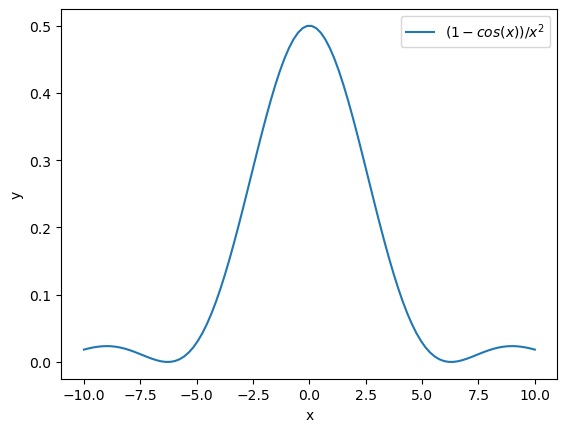

In [13]:
x = np.linspace(-10,10,100)
y = (1-np.cos(x))/x**2
plt.plot(x,y, label='$(1-cos(x))/x^2$')
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

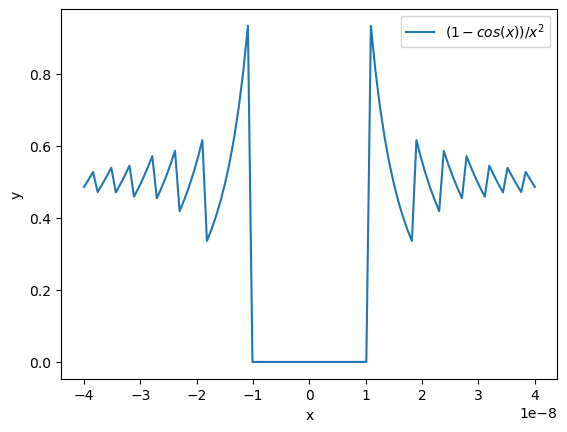

In [14]:
x = np.linspace(-4e-8,4e-8,100)
y = (1-np.cos(x))/x**2
plt.plot(x,y, label='$(1-cos(x))/x^2$')
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

# Que curioso el momento en que se hace 0!

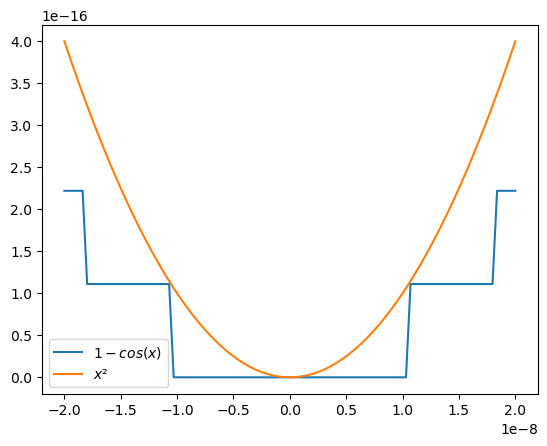

In [15]:
x = np.linspace(-2e-8,2e-8,100)
y = (1-np.cos(x))
plt.plot(x,y, label='$1-cos(x)$')
plt.plot(x,x**2, label='$x²$')
plt.legend();

Si se quiere evitar el problema, en este caso hay que buscar una identidad trigonométrica que no tenga la resta
$\displaystyle \frac{2 sin^2(\frac{x}{2})}{x^2}$

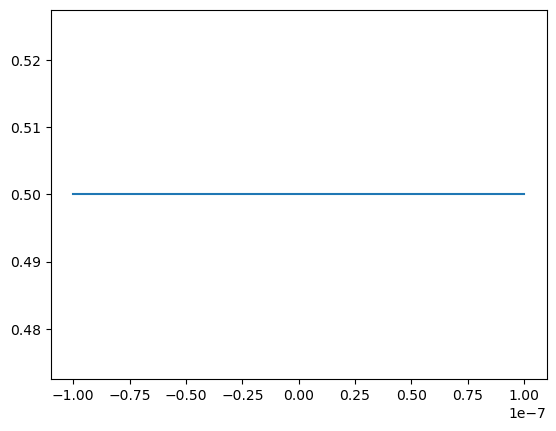

In [16]:
x = np.linspace(-10e-8,10e-8,100)
y = 2*np.sin(x/2)**2/x**2
plt.plot(x,y);

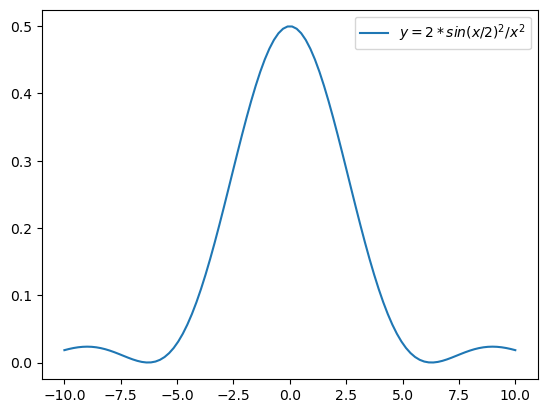

In [18]:
x = np.linspace(-10,10,100)
y = 2*np.sin(x/2)**2/x**2
plt.plot(x,y, label='$y = 2*sin(x/2)^2/x^2$')
plt.legend();

# Experimentación del día


Nos interesa entender las fuentes de error numérico al realizar la suma de muchos números representados con un sistema de punto flotante y comparar distintos algoritmos para realizar esta tarea. ¿Importa el orden en que se suman?

<br>

Posibilidades de algoritmos:

* Ası́ como vengan. Porque es lo más simple. Además queremos un baseline para comparar los otros métodos.
* Usando el algoritmo de Kahan. Porque la catedra nos lo dijo
* Ordenándolos de menor a mayor. Para no perder los numeritos chiquitos
* Ordenándolos de mayor a menor. Porque quiero romper todo.

A tener en cuenta:

* Cómo construimos casos de estudio adecuados?
* Qué sabemos de nuestra función y que deberíamos esperar de los resultados?

---
<br>

También nos interesa evaluar la performance de los algoritmos según el tiempo de ejecución, para eso vamos a medir los tiempos en función del tamaño de la lista de números de entrada.

A tener en cuenta:

* Cómo se comportan los algoritmos para varios tamaños?
* Cómo elegir los tamaños? Tomamos varias mediciones por tamaño?
* Cómo medir los tiempos? Cómo reportamos los resultados?
* Los resultados que se obtienen son razonables?

---





## Consigna

Pedimos:

- Breve experimentación
- Redacción simulacro de TP no más de unos párrafos (https://www.overleaf.com/)
- Para este informe de prueba:

  * No hace falta:

    - Introducción, conclusiones, pseudocódigo de como implementaron una solución al problema o casos de tests para probar que su implementación es correcta.

  * Sí hace falta:

    - Hipótesis y disusión de los resultados obtenidos.

- Sugerencias adicionales:

    - Planteo del problema cientı́fico. Objetivo de la consigna, qué se quiere investigar. Hipótesis previas sobre como funcionarán las cosas.
    - Explicación del algoritmo/objeto de estudio.
    - Proponer y fundamentar la experimentación: de qué forma se vincula lo que van a experimentar con las hipótesis que quieren validar.
    - Explicar los diferentes métodos utilizados para la experimentación


## Algunos casos de estudio

In [107]:
# Errores que se propagan cuando se repiten muchas operaciones.
# Con n = 10 ya se ve el problema
n =10
s = 0
for i in range(n):
  s += 0.1

s

0.9999999999999999

In [22]:
# En clase en un momento probamos con n = 4 y no entendíamos porque el resultado parecía
# Primera observación: el print limita por defecto la cantidad de decimales

# 20 decimales
def p(x):
  return "%0.30f" % x

n = 4
s = 0
for i in range(n):
  s += 0.1

p(s)

'0.400000000000000022204460492503'

In [ ]:
# Ahora veamos que pasa cuando sumamos hasta 0.3
a = 0.1 + 0.1 + 0.1
p(a)


'0.300000000000000044408920985006'

In [ ]:
# Acarreamos error, suficiente para que a no sea equivalente a la representación del 0.3
a - 0.3

5.551115123125783e-17

In [ ]:
# De hecho, caemos en exactamente el proximo número representable luego de 0.3
p(a - (np.nextafter(0.3, 0.4)))

'0.000000000000000000000000000000'

In [ ]:
# Si nos paramos en ese término y sumamos 0.1 veamos que pasa
a = a + 0.1
p(a)

'0.400000000000000022204460492503'

In [ ]:
# Sin embargo
p(a - 0.4)

'0.000000000000000000000000000000'

In [ ]:
# En este caso, el último incremento no hace que el resultado llegue a caer más allá de la representación del 0.4
a - (np.nextafter(0.4, 0.5))

-5.551115123125783e-17

In [ ]:
# Otro caso más general:
# Sumamos n terminos 1/n
# Probar con distintos n
n = 100
suma = 0.0
for i in range(n):
    suma = suma + 1/n
suma

1.0000000000000007

Vamos a definir algunos algoritmos para trabajar con el problema de suma de lista de números.

In [19]:
# Numba permite compilar bloques de código a lenguaje máquina 'just in time'
# Las funciones con el decorator @jit se trataran de esa forma y se utilizará
# el código ya compilado cada vez que se ejecuten en lugar de ser interpretadas
# desde el bytecode.
# De momento, se puede ignorar ya lo veremos con algo más de cuidado más adelante
from numba import jit

In [21]:
@jit
def suma(lista):
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

@jit

def kahan(lista):
    # Accumulator
    suma = 0.0

    #A running compensation for lost low-order bits.
    c = 0.0

    for x in lista:
        y = x - c
        t = suma + y
        c = (t - suma) - y #recupero los digitos menos significativos de y para la próxima
        suma = t
    return suma

Algoritmo de Kahan con un ejemplo https://en.wikipedia.org/wiki/Kahan_summation_algorithm


In [22]:
# Serie términos iguales
n = 100
lista = np.array([1/n]*n)
print(lista)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


In [ ]:
suma(lista),  kahan(lista)

(1.0000000000000007, 1.0)

In [23]:
# Series geométrica
n = 100
r = 0.9
lista = r**np.arange(n)

# Suma fórmula cerrada
(1 - r**n)/(1-r)

9.999734386011127

In [ ]:
suma(lista), suma(np.sort(lista)), suma(np.sort(lista)[::-1]), kahan(lista)

(9.999734386011122, 9.999734386011127, 9.999734386011122, 9.999734386011127)

In [24]:
# Series aleatorios diferentes ordenes de magnitud
n = 10000
r = 0.99
np.random.seed(1)
lista = np.array(r**np.random.randint(1,1000,n))

In [ ]:
suma(lista), suma(np.sort(lista)), suma(np.sort(lista)[::-1]), kahan(lista)

(1020.8543202006157,
 1020.8543202006146,
 1020.8543202006157,
 1020.8543202006142)

## Reporte de distribuciones en experimentos con aleatoriedad

Los errores generados al sumar los elementos de la lista, depende del orden de como estén estos elementos. Podemos computar la suma para muchos ordenamientos distintos y ver la distribución de los errores

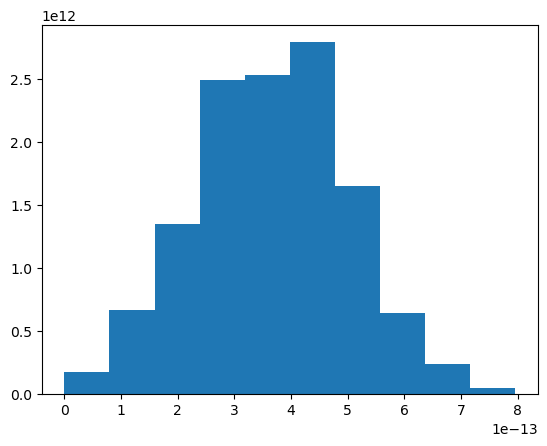

In [25]:
errores = []
n = 10000
r = 0.99
fn = sum
for i in range(1000):
    lista = r**np.arange(n)
    np.random.seed(i)
    np.random.shuffle(lista)
    errores.append(np.abs(fn(lista)-(1 - r**n)/(1-r)))

plt.hist(errores, density=True);

Qué tipo de distribucioń es? Cómo se puede representar graficamente el valor esperado y la dispersión?

## Medición de tiempos

In [26]:
import time
tic = time.time()
time.sleep(1)
toc = time.time()
toc-tic

1.0001943111419678

In [27]:
times = %timeit -r 1 -n 1 -o time.sleep(1)

1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
tic = time.time()
suma(lista)
toc = time.time()
(toc-tic)

0.1159203052520752

In [29]:
# n es la cantiad de veces que se ejecuta la función por repetición
# r es la cantidad de muestras que se toman
# si n no se especifica, se estima automaticamente para que el tiempo total de los loops sea al menos 0.2s
times = %timeit -r 5 -n 100 -o suma(lista)

5.11 μs ± 59.5 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


El tiempo promedio estimado de cada repetición se obtiene por medio de times.timings. También se puede consultar el total en times.all_runs.

Según la documentación:

```python
timings =  [dt / self.loops for dt in all_runs] #self.loops = n
```


Ojo con la resolución del timer!

### Distribución de tiempos

In [39]:
times = %timeit -q -r 5000 -n 10 -o suma(lista)

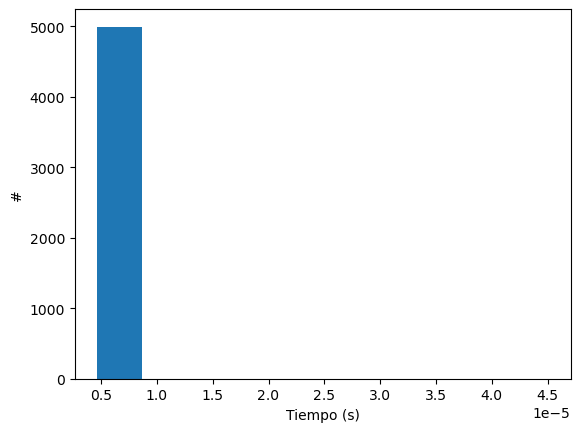

In [67]:
plt.hist(times.timings)
plt.ylabel('#')
plt.xlabel('Tiempo (s)')

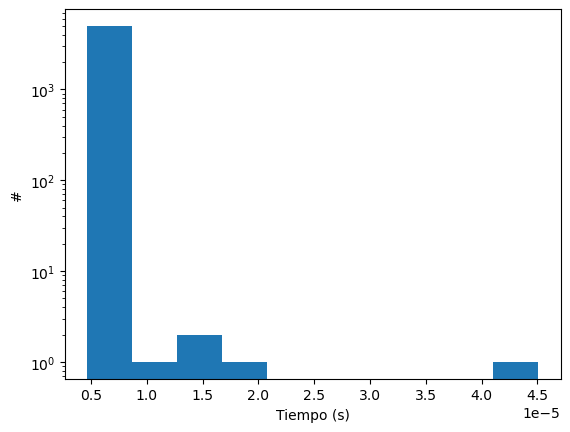

In [66]:
plt.hist(times.timings,log='True');
plt.ylabel('#')
plt.xlabel('Tiempo (s)');

Con escala logarítmica y cambiando los bins también a un arreglo logarítmico se puede ver bien la forma de la distribución de los tiempos. Qué tipo de distribución es?

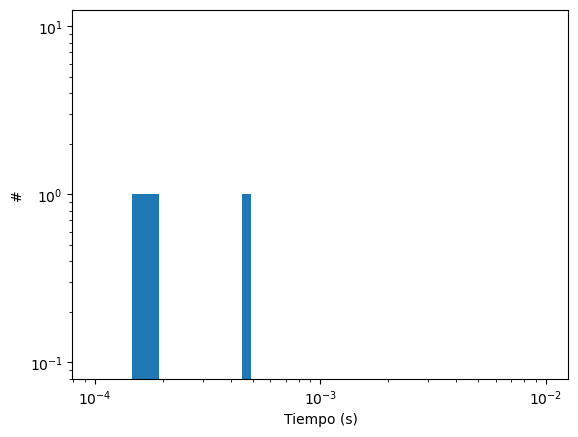

In [65]:
plt.hist(times.all_runs,bins=np.logspace(-4,-2,50));
plt.ylabel('#')
plt.xlabel('Tiempo (s)');
plt.xscale('log')
plt.yscale('log')

In [43]:
np.logspace(-4,-2,50)

array([0.0001    , 0.00010985, 0.00012068, 0.00013257, 0.00014563,
       0.00015999, 0.00017575, 0.00019307, 0.0002121 , 0.000233  ,
       0.00025595, 0.00028118, 0.00030888, 0.00033932, 0.00037276,
       0.00040949, 0.00044984, 0.00049417, 0.00054287, 0.00059636,
       0.00065513, 0.00071969, 0.0007906 , 0.00086851, 0.0009541 ,
       0.00104811, 0.0011514 , 0.00126486, 0.0013895 , 0.00152642,
       0.00167683, 0.00184207, 0.00202359, 0.002223  , 0.00244205,
       0.0026827 , 0.00294705, 0.00323746, 0.00355648, 0.00390694,
       0.00429193, 0.00471487, 0.00517947, 0.00568987, 0.00625055,
       0.00686649, 0.00754312, 0.00828643, 0.00910298, 0.01      ])

In [44]:
10 ** np.linspace(-4,-2,50)

array([0.0001    , 0.00010985, 0.00012068, 0.00013257, 0.00014563,
       0.00015999, 0.00017575, 0.00019307, 0.0002121 , 0.000233  ,
       0.00025595, 0.00028118, 0.00030888, 0.00033932, 0.00037276,
       0.00040949, 0.00044984, 0.00049417, 0.00054287, 0.00059636,
       0.00065513, 0.00071969, 0.0007906 , 0.00086851, 0.0009541 ,
       0.00104811, 0.0011514 , 0.00126486, 0.0013895 , 0.00152642,
       0.00167683, 0.00184207, 0.00202359, 0.002223  , 0.00244205,
       0.0026827 , 0.00294705, 0.00323746, 0.00355648, 0.00390694,
       0.00429193, 0.00471487, 0.00517947, 0.00568987, 0.00625055,
       0.00686649, 0.00754312, 0.00828643, 0.00910298, 0.01      ])

---

## Experimentar!

Estudiar y comparar el tiempo de ejecución y el error numérico de los algoritmos. Utilizar como caso de estudio la suma de una serie geométrica para distintas cantidades de términos ($n$).

Para computar el error absoluto se puede comparar con la fórmula cerrada:

```python
lista = r ** np.arange(n)
error = np.abs(np.sum(lista)-(1 - r**n)/(1-r))
```

Los resultados esperados deberían ser (lo más aproximado) a:

In [45]:
# TO DO
# TO DO
# TO DO

In [55]:
import sys
import numpy as np

def p(x):
  return "%0.30f" % x


In [91]:
def sum_asc(ls):
    np.sort(ls)
    sum = 0.0
    for i in ls:
        sum += i
    return sum

In [90]:
def sum_desc(ls):
    np.sort(ls)[::-1]
    sum = 0.0
    for i in ls:
        sum += i
    return sum

In [35]:
def kahan(ls):
    # Accumulator
    sum = 0.0

    #A running compensation for lost low-order bits.
    c = 0.0

    for x in ls:
        y = x - c
        t = sum + y
        c = (t - sum) - y #recupero los digitos menos significativos de y para la próxima
        sum = t
    return sum

In [136]:
def errores_de_suma(n, r):
    numeros_crecientes = r ** np.arange(n)
    suma_formula_cerrada = (1 - r ** n) / (1 - r)

    suma_normal = np.sum(numeros_crecientes)
    suma_descendente = sum_desc(numeros_crecientes)
    suma_ascendente = sum_asc(numeros_crecientes)
    suma_kahan = kahan(numeros_crecientes)

    error_normal = np.abs(suma_normal - suma_formula_cerrada)
    error_descendente = np.abs(suma_descendente - suma_formula_cerrada)
    error_ascendente = np.abs(suma_ascendente - suma_formula_cerrada)
    error_kahan = np.abs(suma_kahan - suma_formula_cerrada)

    return [p(error_normal), p(error_descendente), p(error_ascendente), p(error_kahan)]

In [134]:
print( np.arange(10) * 0.001953125)

[0.         0.00195312 0.00390625 0.00585938 0.0078125  0.00976562
 0.01171875 0.01367188 0.015625   0.01757812]


In [142]:
razon = 0.025
diez_elementos = errores_de_suma(10, razon)
cien_elementos = errores_de_suma(100, razon)
mil_elementos = errores_de_suma(1000, razon)
diez_mil_elementos = errores_de_suma(10000, razon)

absolute_error = {
    'suma': [diez_elementos[0], cien_elementos[0], mil_elementos[0], diez_mil_elementos[0]],
    'suma_ordenada_descendente': [diez_elementos[1], cien_elementos[1], mil_elementos[1], diez_mil_elementos[1]],
    'suma_ordenada_ascendente': [diez_elementos[2], cien_elementos[2], mil_elementos[2], diez_mil_elementos[2]],
    'suma_kahan': [diez_elementos[3], cien_elementos[3], mil_elementos[3], diez_mil_elementos[3]],
}

print(absolute_error['suma'])
print(absolute_error['suma_ordenada_descendente'])
print(absolute_error['suma_ordenada_ascendente'])
print(absolute_error['suma_kahan'])

['0.000000000000000222044604925031', '0.000000000000000000000000000000', '0.000000000000000000000000000000', '0.000000000000000000000000000000']
['0.000000000000000000000000000000', '0.000000000000000222044604925031', '0.000000000000000222044604925031', '0.000000000000000222044604925031']
['0.000000000000000000000000000000', '0.000000000000000222044604925031', '0.000000000000000222044604925031', '0.000000000000000222044604925031']
['0.000000000000000000000000000000', '0.000000000000000222044604925031', '0.000000000000000222044604925031', '0.000000000000000222044604925031']
